# Perceptron training algorithm - Sai Teja Karnati

In [92]:
import math
import matplotlib.pyplot  as plt
import random
import os
import path
import struct
import gzip
import numpy as np

Inputing data

In [93]:


image_size = 28
trainingImagesCount = 60000
testingImagesCount = 10000

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
    
def read_idx_gz(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

    
trainingdata = read_idx_gz('train-images-idx3-ubyte.gz')
traininglabels = read_idx_gz('train-labels-idx1-ubyte.gz')
testingdata = read_idx_gz('t10k-images-idx3-ubyte.gz')
testinglabels = read_idx_gz('t10k-labels-idx1-ubyte.gz')

Initializing some variables to plot positive and negative points

In [106]:
errors=[]
predVec=[]
n = 1000
epoch = 0
thres = 0.0
alpha = 1.0
weights = np.random.uniform(-1, 1, size=(10,784))
temp_error=1


In [97]:
def stepactivationfn(vec):
    ti = 0
    ta = np.empty([10,1])
    for w in vec:
        if w >= 0:
            ta[ti] = 1.0
        else:
            ta[ti] = 0.0
        w += 1
    return ta

In [98]:
def plot_graph(error):
    fig, ax = plt.subplots(figsize=(10,10))
    plt.plot(range(len(errors)), errors, c = 'green')
    plt.ylabel('Number of Misclassifications')
    plt.xlabel('Number of Epochs')
    plt.title('Errors vs Epochs')
    plt.show()

Function to tell us the accuracy of predictions from updated weights compared to the actual weights

In [99]:
def errorscal():
    e=0
    for i in range(len(testingdata)):
        xi = testingdata[i]
        xi.resize(784, 1)
        v = np.matmul(weights ,xi)
        prediction = v.argmax(axis=0)
        actual = testinglabels[i]
        if prediction != actual:
            e += 1
    print("Number of errors in test data: ", e)
    print("Percentage of test errors: ", e*100/len(testingdata))

Q3:i Function to plot graphs for each epoch with updated weights and accuracy along with points and lines

In [100]:
def plot_graph(errors):
    fig, ax = plt.subplots(figsize=(10,10))
    plt.plot(range(len(errors)), errors, c = 'green')
    plt.ylabel('Number of Misclassifications')
    plt.xlabel('Number of Epochs')
    plt.title('Errors vs Epochs')
    plt.show()

Q4:j - Updating weights using PTA 

In [101]:
def update_weight(weights):
    for i in range(n):
        xi = trainingdata[i]
        xi.resize(784, 1)
        y = np.array(stepactivationfn(np.matmul(weights,xi)))
        label = np.zeros((1,10)).T
        label[traininglabels[i]] = 1
        difference = label - y
        xit = np.transpose(xi)
        update = alpha * np.matmul(difference, xit)
        weights += update

In [102]:
def trainingWeights(trainingdata,weights,traininglabels,epoch,alpha,thres):
    while epoch<100:
        errors.append(0)
        errors[epoch] = training_errors(epoch, errors)
        update_weight(weights)
        epoch += 1
        if errors[epoch-1]/n <= thres:
            break
            
        

In [103]:
def find_errors():
    test_errors = 0
    for i in range(len(testingdata)):
        xi = testingdata[i]
        xi.resize(784, 1)
        v = np.matmul(weights ,xi)
        prediction = v.argmax(axis=0)
        actual = testinglabels[i]
        if prediction != actual:
            test_errors += 1
    print("Number of errors in test data: ", test_errors)
    print("Percentage of test errors: ", test_errors*100/len(testingdata))

In [104]:
def training_errors(epoch, errors):
    for i in range(n):
        xi = trainingdata[i]
        xi.resize(784, 1)
        v = np.matmul(weights,xi)
        prediction = v.argmax(axis=0)
        actual = traininglabels[i]
        if prediction != actual:
            errors[epoch] += 1
    return errors[epoch]

Finally, calling the training functions, we can change the last two hyperparameters:epochs, learning rate alpha respectively

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """


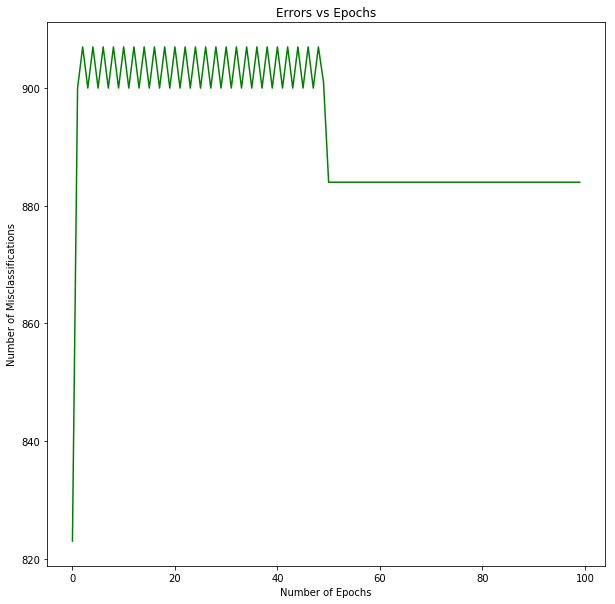

Number of errors in test data:  8865
Percentage of test errors:  88.65


In [107]:
trainingWeights(trainingdata,weights,traininglabels,epoch,alpha,thres)
plot_graph(errors)
find_errors()

In [65]:
len(testingdata)

1000

In [77]:
errors


[47,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 46,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43]